# Project Part 2: Benchmark and Optimization

In this milestone you will provide a report which includes the results of your benchmark and optimization.  Your report will include a performance benchmark on a single core and then a description of what you did to speed up the code and a graph of how much improvement you made over the benchmark.  Your final report should include the following:

- Project Title
- Motivating Image
- Abstract
- Methodology
- Timing Results
- Concluding Discussion and Future Work
- References


To help you out your instructor has provided the following template


---- START TEMPLATE ----

# Part 2 - Project Title 

By Maximus Sambucetti

&#9989; Replace the following with a picture that "defines" your project.  This could be software logo, an expected outcome of your project, or a graphical representation of the research area. Again, it is okay to use the picture from the proposal but it is also good to come up with a new unique picture.  

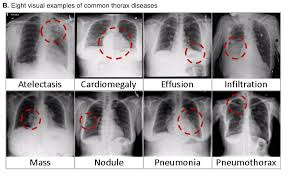

Image from: https://academictorrents.com/details/557481faacd824c83fbf57dcf7b6da9383b3235a

---
# Abstract

My project focuses on the healthcare domain, specifically the use of deep learning for medical image classification. The goal is to identify diseases in chest X-ray images using a CNN. I chose this domain because of my recent research in one of my other classes and I wanted to see how accurate I could make a model. This implementation could help make more consistent diagnoses. In this domain computation is important because it enables automated analysis of large medical image datasets. This would tremendously reduce manual effort and improve accuracy. In this project I trained a classifier to attempt to use X-ray iimages and identify the presence of a disease or not. My focus was to find ways to improve model training and parallelizing the training process. 


---
# Methodology

The project focuses on automated disease classification using chest X-ray images. The goal is to develope a CNN and parallelize the training process to speed up the processing of large amounts of images to train on. It leverages TensorFlow with the DenseNet121 model for learning. All training is performed using Slurm, with GPU acceleration and utilizes the built in MirroredStrategy() that comes with tensorflow. 

Instructions:
1. Copy the Git repository to your preferred directory
2. To get the data go to this website https://nihcc.app.box.com/v/ChestXray-NIHCC
3. Make sure to unzip the Data_Entry_2017.csv file and make sure you have all the images in the images/ directory (there are a lot)
4. Make sure you adjust the Slurm script in the run.sh file and adjust the #SBATCH parameters where needed
5. To run the script type "sbatch run.sh"
6. This should create a slurm*.out file that you can cat out in your terminal


---
# Timing Results

The results strongly show that the use of GPUs and the parallelization of tensorflow's mirrored strategy lowers the amount of time it takes for the model to train for each epoch. It was originally taking about 4 hours and significantly dropped to 2 hours. In total the job took about 21 hours to run all 10 epochs and evaluate the model. Which is a tremendous decrease from the original model. The hardware used was my windows laptop and the msu HPCC with multiple nodes being assigned to training the model. It met expectations completely and there were not any big anomolies.

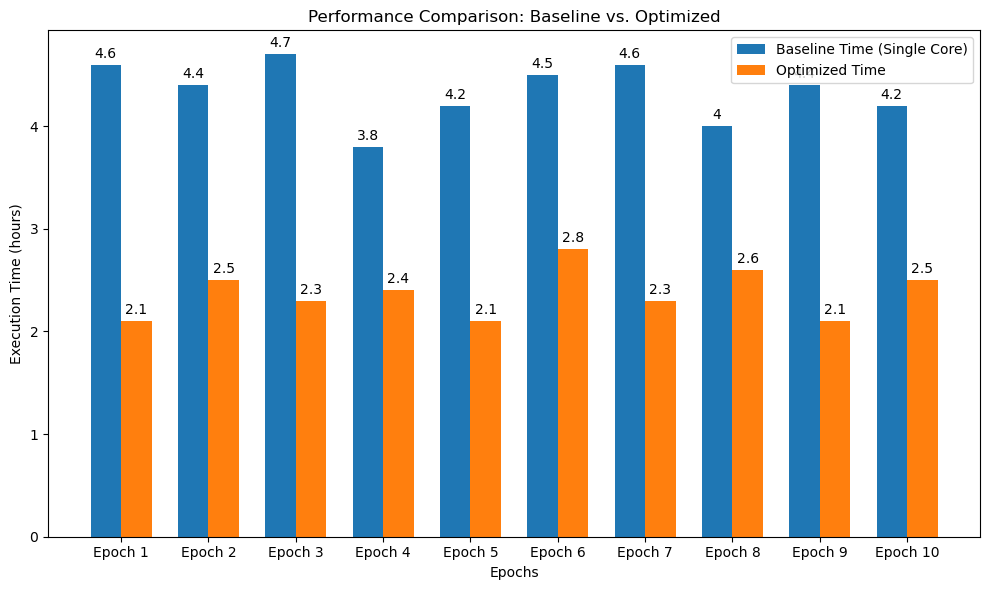

In [5]:
import matplotlib.pyplot as plt
import numpy as np

baseline_time = np.array([4.6, 4.4, 4.7, 3.8, 4.2, 4.5, 4.6, 4.0, 4.4, 4.2]) # hours

optimized_time = np.array([2.1, 2.5, 2.3, 2.4, 2.1, 2.8, 2.3, 2.6, 2.1, 2.5]) # hours

labels = ['Epoch 1', 'Epoch 2', 'Epoch 3', 'Epoch 4', 'Epoch 5', 'Epoch 6', 'Epoch 7', 'Epoch 8', 'Epoch 9', 'Epoch 10']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, baseline_time, width, label='Baseline Time (Single Core)')
rects2 = ax.bar(x + width/2, optimized_time, width, label='Optimized Time')

ax.set_ylabel('Execution Time (hours)')
ax.set_xlabel('Epochs')
ax.set_title('Performance Comparison: Baseline vs. Optimized')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()


---
# Concluding Discussion and Future Work

&#9989;  Give another short description of the project and your final results.  Use this to talk about what you learned in this project.  Include what you found interesting and what would be a next step. 

Overall the model performed poorly but the optimizations applied to the python code very well and decreased the amount of time needed to train each epoch of the model drastically. As seen in the graph the average time was about 4.5 hours and with the optimizations it dropped by about half. I learned in this project that machine learning heavily relies on the use of GPUs and parallelization to train especially when dealing with large amounts of data to train on. This is a perfect application to the real world, for example ChatGPT uses tons of high tech GPUs to help it consistently train on massive amounts of internet data. In this example the amount of disease cases found in chests with x-rays is massive and having a system that can train fast and efficiently is crucial. The next step would be to optimize the model as best as possible and maybe applying more GPUs and nodes per epoch. I found the idea of parallelizing model training to be extremely interesting mainly because I love to understand and work with AI models. 

---
# References

1. https://arxiv.org/abs/1712.02029
2. https://www.tensorflow.org/api_docs/python/tf/distributeMirroredStrategy
3. https://www.byteplus.com/en/topic/499036?title=tensorflow-mirroredstrategy-example-mastering-distributed-training

---- END TEMPLATE ----

-----
### Congratulations, you are done!

Now, you just need to create a second directory in your git repository and include your report as an md or ipynb file in the directory along with any additional figures and files needed to reproduce the results.  You instructor should already have your git repository and be able to pull in your changes. 

Written by Dr. Dirk Colbry, Michigan State University (Updated by Dr. Nathan Haut in Spring 2025)
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----